loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


SelectMultiple(description='Categories', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

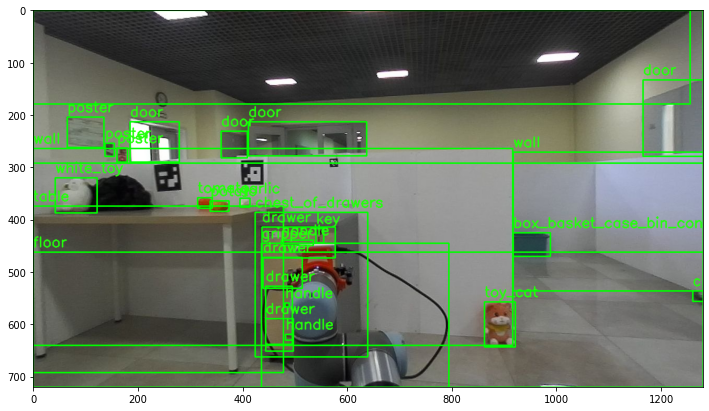

In [6]:
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from pycocotools.coco import COCO

# путь к файлу аннотации
ann_file = '../dataset/result.json'

# загрузим COCO аннотации
coco = COCO(ann_file)

# путь к папке с изображениями
image_dir = '../dataset/imgs'

# получим все уникальные category_id в датасете
unique_categories = [cat['id'] for cat in coco.loadCats(coco.getCatIds())]

# создадим виджет для выбора категорий
category_selector = widgets.SelectMultiple(
    options=[(cat['name'], cat['id']) for cat in coco.loadCats(unique_categories)],
    value=unique_categories,
    description='Categories',
    disabled=False
)
display(category_selector)

def plot_bboxes(image_id):
    # загрузим изображение
    img_data = coco.loadImgs(image_id)[0]
    img_path = os.path.join(image_dir, img_data['file_name'])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # получим аннотации для данного изображения
    ann_ids = coco.getAnnIds(imgIds=image_id, catIds=category_selector.value, iscrowd=None)
    anns = coco.loadAnns(ann_ids)

    # наложим bbox-ы на изображение
    for ann in anns:
        x, y, w, h = ann['bbox']
        img = cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)
        cv2.putText(img, coco.loadCats(ann['category_id'])[0]['name'], (int(x), int(y-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    # визуализируем результат
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.show()

def on_value_change(change):
    clear_output()
    display(category_selector)
    plot_bboxes(image_id)

category_selector.observe(on_value_change, 'value')

# замените image_id на id изображения, которое вы хотите визуализировать
image_id = 1
plot_bboxes(image_id)
